## import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings(action='ignore')

## loading Data

In [2]:
data=pd.read_csv('Spotify-2000.csv')
data.head()

,Index,Title,Artist,Top_Genre,Year,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top_Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats_Per_Minute_(BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness_(dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length_(Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

## Data Cleaning


In [4]:
data.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top_Genre                 0
Year                      0
Beats_Per_Minute_(BPM)    0
Energy                    0
Danceability              0
Loudness_(dB)             0
Liveness                  0
Valence                   0
Length_(Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

<Axes: >

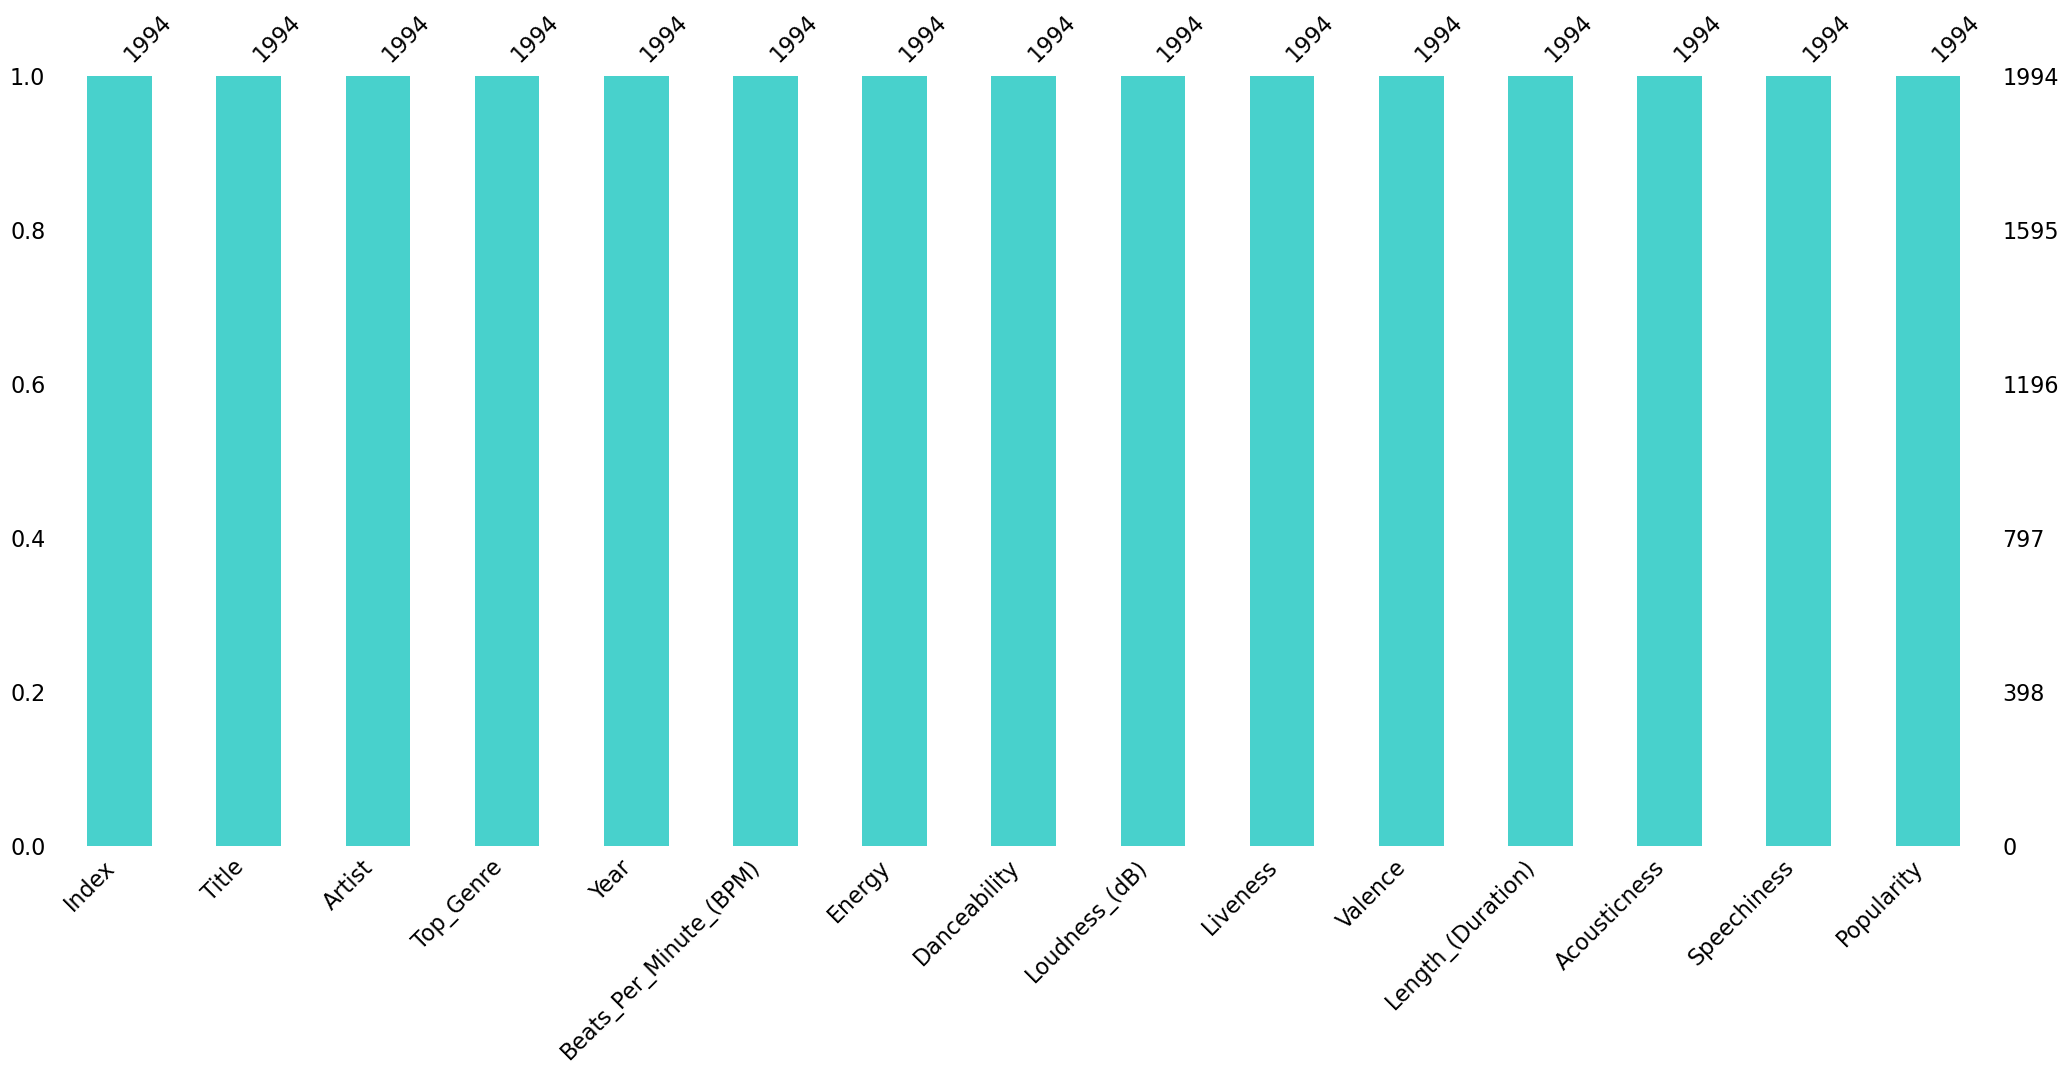

In [5]:
msno.bar(data,color='mediumturquoise')

In [6]:
data.drop('Index',axis=1,inplace=True)
data.head()

,Title,Artist,Top_Genre,Year,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [7]:
data['BPM']=data['Beats_Per_Minute_(BPM)']
data.drop('Beats_Per_Minute_(BPM)',axis=1,inplace=True)
data['dB']=data['Loudness_(dB)']
data.drop('Loudness_(dB)',axis=1,inplace=True)
data['Duration']=data['Length_(Duration)']
data.drop('Length_(Duration)',axis=1,inplace=True)

In [8]:
cols=data.columns

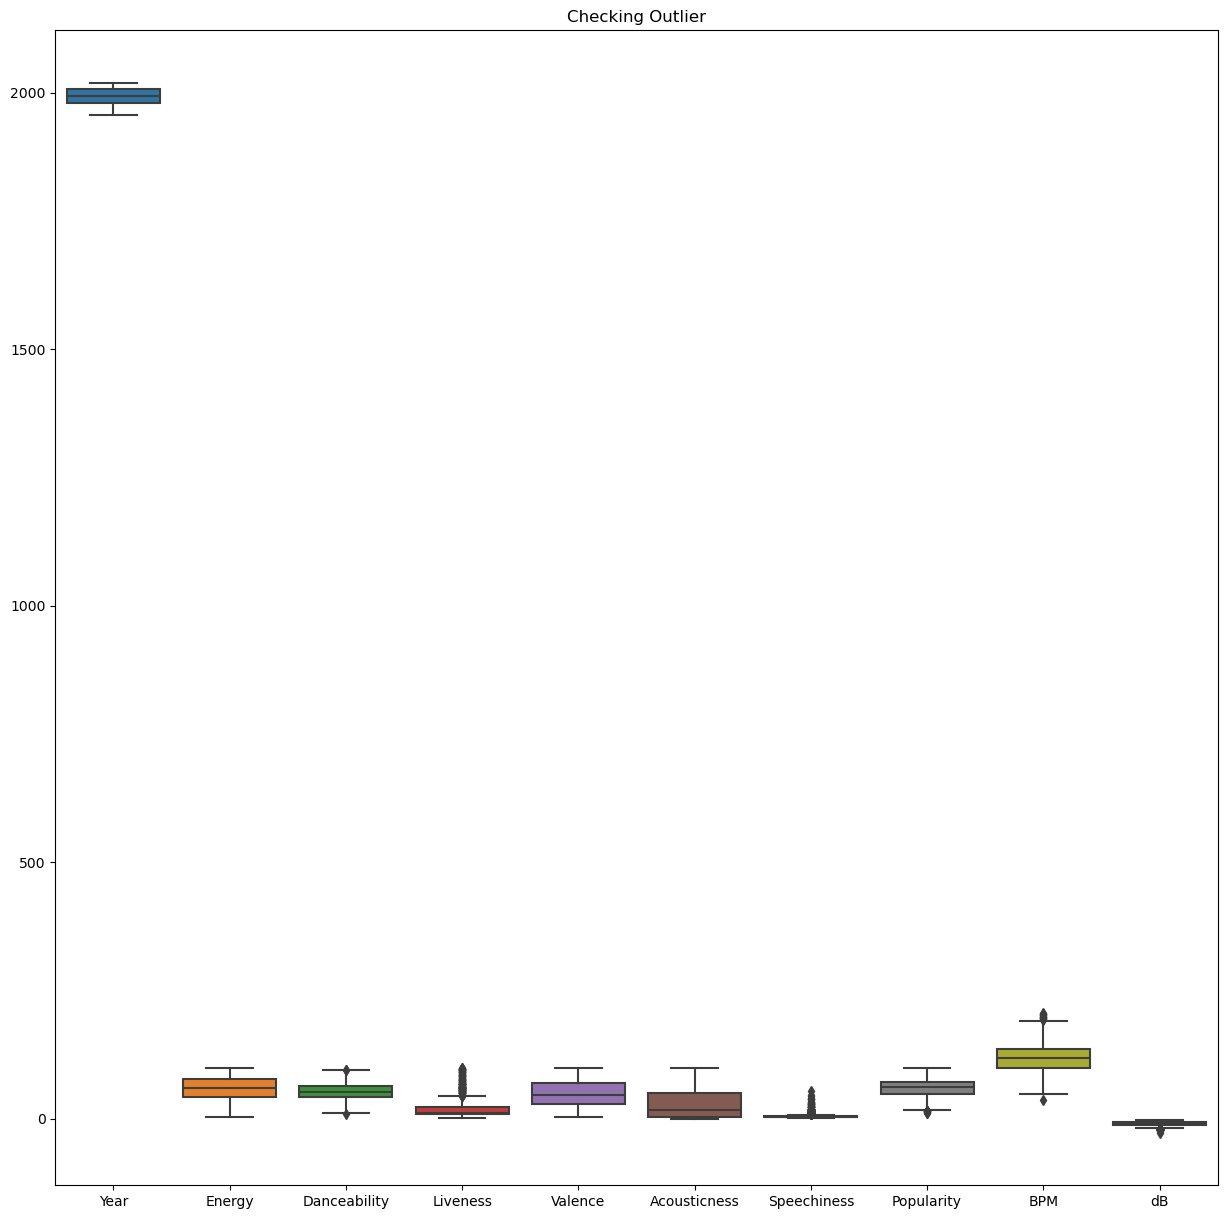

In [9]:
plt.figure(figsize=(15,15))
plt.title('Checking Outlier')
sns.boxplot(data[cols]);

## Encoding

In [10]:
le=LabelEncoder()

In [11]:
data['Title']=le.fit_transform(data['Title'])
data['Artist']=le.fit_transform(data['Artist'])
data['Top_Genre']=le.fit_transform(data['Top_Genre'])
data['Duration']=le.fit_transform(data['Duration'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Title         1994 non-null   int32
 1   Artist        1994 non-null   int32
 2   Top_Genre     1994 non-null   int32
 3   Year          1994 non-null   int64
 4   Energy        1994 non-null   int64
 5   Danceability  1994 non-null   int64
 6   Liveness      1994 non-null   int64
 7   Valence       1994 non-null   int64
 8   Acousticness  1994 non-null   int64
 9   Speechiness   1994 non-null   int64
 10  Popularity    1994 non-null   int64
 11  BPM           1994 non-null   int64
 12  dB            1994 non-null   int64
 13  Duration      1994 non-null   int32
dtypes: int32(4), int64(10)
memory usage: 187.1 KB


In [13]:
X=data.drop('Year',axis=1)
y=data['Year']

## Scaling

In [14]:
SS= StandardScaler()
SS.fit_transform(X)

array([[ 0.98045792,  0.44675007, -1.13489881, ...,  1.31273922,
        -1.36866659, -0.82957907],
       [-1.38870567, -0.92483663, -1.0678049 , ...,  0.52761564,
        -0.546064  , -0.73936579],
       [-1.2168217 , -0.46292771, -1.00071099, ...,  1.705301  ,
         0.00233772,  1.24532623],
       ...,
       [-0.24576587, -1.10865753, -0.41923041, ...,  1.705301  ,
         0.00233772, -1.41596535],
       [ 1.02298591,  1.31400764, -0.55341823, ...,  1.91942561,
        -1.09446573,  1.0047575 ],
       [-1.35680968, -0.64674861, -1.13489881, ...,  0.45624077,
        -0.27186314, -1.62646299]])

## Split the Dataset

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

## Model 

In [16]:
LG=LogisticRegression()
LG.fit(X_train,y_train)
ytrain_pred=LG.predict(X_train)
ytest_pred=LG.predict(X_test)
train_accuracy=accuracy_score(y_train,ytrain_pred)
test_accuracy=accuracy_score(y_test,ytest_pred)
print("Training Accuracy : ",train_accuracy)
print("Test Accuracy : ",test_accuracy)
print("Mean Squared Error:", mean_squared_error(y_test,ytest_pred))
print("Classification Report:\n",classification_report(y_train,ytrain_pred))


Training Accuracy :  0.09153605015673981
Test Accuracy :  0.03258145363408521
Mean Squared Error: 309.52130325814534
Classification Report:
               precision    recall  f1-score   support

        1956       0.00      0.00      0.00         1
        1958       0.00      0.00      0.00         4
        1959       0.00      0.00      0.00         3
        1960       0.00      0.00      0.00         1
        1961       0.00      0.00      0.00         1
        1962       0.00      0.00      0.00         3
        1963       0.09      0.14      0.11         7
        1964       0.00      0.00      0.00         7
        1965       0.23      0.23      0.23        13
        1966       0.14      0.33      0.19        18
        1967       0.12      0.27      0.16        30
        1968       0.00      0.00      0.00        17
        1969       0.05      0.06      0.06        32
        1970       0.07      0.11      0.08        35
        1971       0.09      0.33      0.14     

In [17]:
RF=RandomForestClassifier(n_estimators=1000)
RF.fit(X_train,y_train)
ytrain_pred=RF.predict(X_train)
ytest_pred=RF.predict(X_test)
train_accuracy=accuracy_score(y_train,ytrain_pred)
test_accuracy=accuracy_score(y_test,ytest_pred)
print("Training Accuracy : ",train_accuracy)
print("Test Accuracy : ",test_accuracy)
print("Mean Squared Error:", mean_squared_error(y_test,ytest_pred))
print("Classification Report:\n",classification_report(y_train,ytrain_pred))

Training Accuracy :  1.0
Test Accuracy :  0.12280701754385964
Mean Squared Error: 171.81704260651628
Classification Report:
               precision    recall  f1-score   support

        1956       1.00      1.00      1.00         1
        1958       1.00      1.00      1.00         4
        1959       1.00      1.00      1.00         3
        1960       1.00      1.00      1.00         1
        1961       1.00      1.00      1.00         1
        1962       1.00      1.00      1.00         3
        1963       1.00      1.00      1.00         7
        1964       1.00      1.00      1.00         7
        1965       1.00      1.00      1.00        13
        1966       1.00      1.00      1.00        18
        1967       1.00      1.00      1.00        30
        1968       1.00      1.00      1.00        17
        1969       1.00      1.00      1.00        32
        1970       1.00      1.00      1.00        35
        1971       1.00      1.00      1.00        40
        19